In [52]:
#Imports
import math
import requests
import json
import csv
import pandas as pd
import pybliometrics
from pybliometrics.scopus import ScopusSearch
from pybliometrics.scopus import AbstractRetrieval
import requests
from requests.exceptions import HTTPError
import matplotlib.pyplot as plt

In [41]:
pybliometrics.scopus.init()

In [ ]:
q = "SUBJAREA(COMP) AND AFFILCOUNTRY(Ecuador)"
s = ScopusSearch(q, verbose=True, view='COMPLETE')
## 24/06/2024

In [39]:
df = pd.DataFrame(s.results)

In [40]:
len(df)

12786

In [41]:
df

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-85191756511,10.1186/s13634-024-01155-x,None,None,Evaluation of features and channels of electro...,ar,Article,Carrión-Ojeda D.,60105012;60086943;60072059;60026796;60011226;1...,Yachay University for Experimental Technology ...,...,None,Biometric systems are essential tools in moder...,Biometric System | Channels | Discrete-Wavelet...,0,1,publisherfullgold,Gold,None,undefined,None
1,2-s2.0-85186908349,10.1186/s13321-024-00816-1,None,None,Prediction of compound-target interaction usin...,ar,Article,Jimenes-Vargas K.,60104441;60025427;60023610,Universidad de las Americas - Ecuador;Complejo...,...,None,For understanding a chemical compound’s mechan...,Ligan-based modeling | Machine learning | QSAR...,0,1,publisherfullgold,Gold,UB,ED431C 2022/46,University of Bern
2,2-s2.0-85185890281,10.1186/s42162-024-00318-2,None,None,Enhanced fault detection in polymer electrolyt...,ar,Article,Melo E.,60278953;60072061;60072042;60023256,Universidad Bolivariana del Ecuador;Escuela Su...,...,None,The growing energy demand and population raisi...,Classification problems | Deep learning models...,0,1,publisherfullgold,Gold,None,undefined,None
3,2-s2.0-85185118887,10.1007/s10822-024-00550-8,None,38351144,Rethinking the applicability domain analysis i...,ar,Article,Mora J.R.,60104441;60072059;60054319;60032563;60026796;6...,Universidad de las Americas - Ecuador;Universi...,...,None,Notwithstanding the wide adoption of the OECD ...,Applicability domain | Error analysis | OECD p...,0,0,None,None,None,undefined,None
4,2-s2.0-85196035889,10.1016/j.jss.2024.112114,S0164121224001596,None,Variability management and software product li...,ar,Article,Gutiérrez-Fernández A.M.,60110504;60033284;60021931;60003662,Universidad Estatal de Milagro;Universidad de ...,...,None,Software product line engineering aims to syst...,Software product lines,0,1,None,None,MCIU,RED2022-134337-T,"Ministerio de Ciencia, Innovación y Universidades"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12781,2-s2.0-77954021326,10.1109/FIE.1993.405440,None,None,Restructuring for the next century: An electri...,cp,Conference Paper,Cañizares C.A.,60072054;60014171,Escuela Politécnica Nacional;University of Wat...,...,658-662,The problems of Ecuadorian universities are pr...,None,0,0,None,None,None,undefined,None
12782,2-s2.0-84980010218,10.1007/3-540-56798-4_223,None,None,On-line performance enhancement of a behaviora...,cp,Conference Paper,Pimentel J.R.,60072054;60028442;60001741;106638881,Escuela Politécnica Nacional;Universidad Polit...,...,694-701,We present a method to enhance tile performanc...,None,1,0,None,None,None,undefined,None
12783,2-s2.0-0026623163,10.1016/0169-7439(92)80026-Z,016974399280026Z,None,The chemical meaning of topological indices,ar,Article,Todeschini R.,60108603;60030318,Escuela Superior Politécnica de Chimborazo;Uni...,...,51-59,"Todeschini, R., Cazar, R. and Collina, E., 199...",None,34,0,None,None,None,undefined,None
12784,2-s2.0-0022593529,10.1016/0045-7930(86)90007-1,0045793086900071,None,Analysis of free-surface flows past overflow g...,ar,Article,Castro-Delgado M.,60072054;60029428,Escuela Politécnica Nacional;Karlsruher Instit...,...,159-169,A calculation procedure for the analysis of fl...,None,2,0,None,None,DAAD,undefined,Deutscher Akademischer Austauschdienst


In [42]:
df.to_csv('ScopusSearch.csv', index=False)

In [45]:
data = pd.read_csv("ScopusSearch.csv")

In [6]:
data ## doi para sacar con doi.org/
    ##

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-85191756511,10.1186/s13634-024-01155-x,NaN,NaN,Evaluation of features and channels of electro...,ar,Article,Carrión-Ojeda D.,60105012;60086943;60072059;60026796;60011226;1...,Yachay University for Experimental Technology ...,...,NaN,Biometric systems are essential tools in moder...,Biometric System | Channels | Discrete-Wavelet...,0,1,publisherfullgold,Gold,NaN,undefined,NaN
1,2-s2.0-85186908349,10.1186/s13321-024-00816-1,NaN,NaN,Prediction of compound-target interaction usin...,ar,Article,Jimenes-Vargas K.,60104441;60025427;60023610,Universidad de las Americas - Ecuador;Complejo...,...,NaN,For understanding a chemical compound’s mechan...,Ligan-based modeling | Machine learning | QSAR...,0,1,publisherfullgold,Gold,UB,ED431C 2022/46,University of Bern
2,2-s2.0-85185890281,10.1186/s42162-024-00318-2,NaN,NaN,Enhanced fault detection in polymer electrolyt...,ar,Article,Melo E.,60278953;60072061;60072042;60023256,Universidad Bolivariana del Ecuador;Escuela Su...,...,NaN,The growing energy demand and population raisi...,Classification problems | Deep learning models...,0,1,publisherfullgold,Gold,NaN,undefined,NaN
3,2-s2.0-85185118887,10.1007/s10822-024-00550-8,NaN,38351144.0,Rethinking the applicability domain analysis i...,ar,Article,Mora J.R.,60104441;60072059;60054319;60032563;60026796;6...,Universidad de las Americas - Ecuador;Universi...,...,NaN,Notwithstanding the wide adoption of the OECD ...,Applicability domain | Error analysis | OECD p...,0,0,NaN,NaN,NaN,undefined,NaN
4,2-s2.0-85196035889,10.1016/j.jss.2024.112114,S0164121224001596,NaN,Variability management and software product li...,ar,Article,Gutiérrez-Fernández A.M.,60110504;60033284;60021931;60003662,Universidad Estatal de Milagro;Universidad de ...,...,NaN,Software product line engineering aims to syst...,Software product lines,0,1,NaN,NaN,MCIU,RED2022-134337-T,"Ministerio de Ciencia, Innovación y Universidades"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12781,2-s2.0-77954021326,10.1109/FIE.1993.405440,NaN,NaN,Restructuring for the next century: An electri...,cp,Conference Paper,Cañizares C.A.,60072054;60014171,Escuela Politécnica Nacional;University of Wat...,...,658-662,The problems of Ecuadorian universities are pr...,NaN,0,0,NaN,NaN,NaN,undefined,NaN
12782,2-s2.0-84980010218,10.1007/3-540-56798-4_223,NaN,NaN,On-line performance enhancement of a behaviora...,cp,Conference Paper,Pimentel J.R.,60072054;60028442;60001741;106638881,Escuela Politécnica Nacional;Universidad Polit...,...,694-701,We present a method to enhance tile performanc...,NaN,1,0,NaN,NaN,NaN,undefined,NaN
12783,2-s2.0-0026623163,10.1016/0169-7439(92)80026-Z,016974399280026Z,NaN,The chemical meaning of topological indices,ar,Article,Todeschini R.,60108603;60030318,Escuela Superior Politécnica de Chimborazo;Uni...,...,51-59,"Todeschini, R., Cazar, R. and Collina, E., 199...",NaN,34,0,NaN,NaN,NaN,undefined,NaN
12784,2-s2.0-0022593529,10.1016/0045-7930(86)90007-1,0045793086900071,NaN,Analysis of free-surface flows past overflow g...,ar,Article,Castro-Delgado M.,60072054;60029428,Escuela Politécnica Nacional;Karlsruher Instit...,...,159-169,A calculation procedure for the analysis of fl...,NaN,2,0,NaN,NaN,DAAD,undefined,Deutscher Akademischer Austauschdienst


In [4]:
len(data)

12786

In [7]:
data.columns

Index(['eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype',
       'subtypeDescription', 'creator', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'coverDate',
       'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn',
       'aggregationType', 'volume', 'issueIdentifier', 'article_number',
       'pageRange', 'description', 'authkeywords', 'citedby_count',
       'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no',
       'fund_sponsor'],
      dtype='object')

In [10]:
abstract = data[['eid']] 
abstract.loc[:, ['url']] = None
abstract.loc[:, ['idxterms']] = None
abstract.loc[:, ['publisher']] = None
abstract.loc[:, ['language']] = None

## Lista para referencias
a = []

abstract

,eid,url,idxterms,publisher,language
0,2-s2.0-85191756511,None,None,None,None
1,2-s2.0-85186908349,None,None,None,None
2,2-s2.0-85185890281,None,None,None,None
3,2-s2.0-85185118887,None,None,None,None
4,2-s2.0-85196035889,None,None,None,None
...,...,...,...,...,...
12781,2-s2.0-77954021326,None,None,None,None
12782,2-s2.0-84980010218,None,None,None,None
12783,2-s2.0-0026623163,None,None,None,None
12784,2-s2.0-0022593529,None,None,None,None


In [11]:
for i in range(6393):
    eid = abstract.loc[i, 'eid']
    ar = AbstractRetrieval(eid, view='FULL')
         # Entre 28-30/06/2024
    abstract.loc[i, 'url'] = ar.scopus_link
    try:
        abstract.loc[i, 'idxterms'] = ar.idxterms
    except: 
        pass
    try:
        abstract.loc[i, 'publisher'] = ar.publisher
    except: 
        pass
    try:
         for r in ar.references:
            a.append([eid, r.position, r.id, r.doi, r.title, r.authors, r.authors_auid, r.authors_affiliationid, r.sourcetitle,
                      r.publicationyear,r.su])
    except: 
        pass
    try:
        abstract.loc[i, 'language'] = ar.language
    except: 
        pass
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
for i in range(6393, 12786):
    eid = abstract.loc[i, 'eid']
    ar = AbstractRetrieval(eid, view='FULL')
    abstract.loc[i, 'url'] = ar.scopus_link
    try:
        abstract.loc[i, 'idxterms'] = ar.idxterms
    except: 
        pass
    try:
        abstract.loc[i, 'publisher'] = ar.publisher
    except: 
        pass
    try:
        for r in ar.references:
            a.append([eid, r.position, r.id, r.doi, r.title, r.authors, r.authors_auid, r.authors_affiliationid, r.sourcetitle,
                      r.publicationyear])
    except: 
        pass
    try:
        abstract.loc[i, 'language'] = ar.language
    except: 
        pass
    print(i)


6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592


In [68]:
abstract.to_csv('AbstractRetrieval.csv', index=False)


In [69]:
ref = pd.DataFrame(a[:])
nam = [
    'eid', 'position', 'id', 'doi', 'title', 
    'authors', 'authors_auid', 'authors_affiliationid', 
    'sourcetitle', 'publicationyear'
]

# Asignar los nuevos nombres a las columnas
ref.columns = nam
ref.to_csv('references.csv', index=False)
ref

## Selección de Springer como editorial a utilizar para la seleccion de PDFs

In [43]:
data1 = pd.read_csv("AbstractRetrieval.csv")

In [44]:
data1

,eid,url,idxterms,publisher,language
0,2-s2.0-85191756511,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
1,2-s2.0-85186908349,https://www.scopus.com/inward/record.uri?partn...,NaN,BioMed Central Ltd,eng
2,2-s2.0-85185890281,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Nature,eng
3,2-s2.0-85185118887,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
4,2-s2.0-85196035889,https://www.scopus.com/inward/record.uri?partn...,NaN,Elsevier Inc.,eng
...,...,...,...,...,...
12781,2-s2.0-77954021326,https://www.scopus.com/inward/record.uri?partn...,NaN,NaN,eng
12782,2-s2.0-84980010218,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng
12783,2-s2.0-0026623163,https://www.scopus.com/inward/record.uri?partn...,NaN,NaN,eng
12784,2-s2.0-0022593529,https://www.scopus.com/inward/record.uri?partn...,NaN,NaN,eng


In [46]:
springer_filter = data1[data1['publisher'].str.contains('Springer', case=False, na=False)]
springer_filter['publisher'].unique()

array(['Springer Science and Business Media Deutschland GmbH',
       'Springer Nature', 'Springer',
       'Springer Science and Business Media B.V.',
       'Springer International Publishing', 'Springer Verlag',
       'Springer London', 'Springer New York LLC', 'Springer Heidelberg',
       'Springer Netherlands', 'Springer-Verlag Wien',
       'Springer Berlin Heidelberg',
       'Springer Science and Business Media, LLC',
       'Springer-Verlag London Ltd', 'Springer Singapore', 'SpringerOpen'],
      dtype=object)

In [48]:
conteo_publicadores = springer_filter['publisher'].value_counts()
conteo_publicadores

publisher
Springer Science and Business Media Deutschland GmbH    2427
Springer Verlag                                          943
Springer                                                 509
Springer International Publishing                         34
Springer New York LLC                                     23
Springer Science and Business Media B.V.                  14
Springer London                                           12
Springer Nature                                            7
Springer Heidelberg                                        5
Springer Netherlands                                       3
Springer Berlin Heidelberg                                 3
Springer-Verlag Wien                                       1
Springer Science and Business Media, LLC                   1
Springer-Verlag London Ltd                                 1
Springer Singapore                                         1
SpringerOpen                                               1
Name: count, d

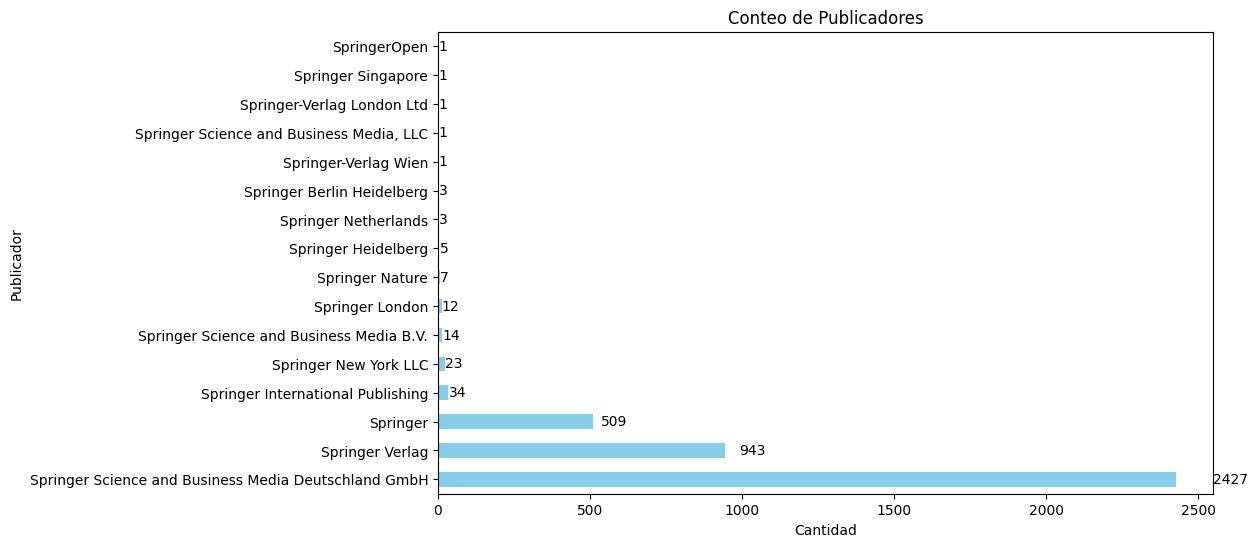

In [57]:
import matplotlib.pyplot as plt

# Supongamos que conteo_publicadores es una Serie de pandas con la información para el gráfico
# conteo_publicadores = pd.Series(...)  # Tu serie de datos para el gráfico

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
ax = conteo_publicadores.plot(kind='barh', color='skyblue')

# Agregar los valores al final de cada barra de manera horizontal
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.05 * width, p.get_y() + p.get_height() / 2,  # Posición del texto
            int(width),  # El valor que se mostrará
            va='center',  # Alinear verticalmente al centro
            ha='left')  # Alinear horizontalmente a la izquierda

plt.title('Conteo de Publicadores')
plt.xlabel('Cantidad')
plt.ylabel('Publicador')
plt.show()


In [11]:
springer_filter

,eid,url,idxterms,publisher,language
0,2-s2.0-85191756511,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
2,2-s2.0-85185890281,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Nature,eng
3,2-s2.0-85185118887,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
17,2-s2.0-85193957362,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer,eng
30,2-s2.0-85192384258,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
...,...,...,...,...,...
12734,2-s2.0-37849002626,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng
12749,2-s2.0-33845189936,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng
12750,2-s2.0-33750570267,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng
12779,2-s2.0-0029710874,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng


In [ ]:
merged_df = pd.merge(data, springer_filter, left_on='eid', right_on='eid', how='inner')

In [13]:
merged_df = merged_df[merged_df['doi'].notna()]
merged_df

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor,url,idxterms,publisher,language
0,2-s2.0-85191756511,10.1186/s13634-024-01155-x,NaN,NaN,Evaluation of features and channels of electro...,ar,Article,Carrión-Ojeda D.,60105012;60086943;60072059;60026796;60011226;1...,Yachay University for Experimental Technology ...,...,1,publisherfullgold,Gold,NaN,undefined,NaN,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
1,2-s2.0-85185890281,10.1186/s42162-024-00318-2,NaN,NaN,Enhanced fault detection in polymer electrolyt...,ar,Article,Melo E.,60278953;60072061;60072042;60023256,Universidad Bolivariana del Ecuador;Escuela Su...,...,1,publisherfullgold,Gold,NaN,undefined,NaN,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Nature,eng
2,2-s2.0-85185118887,10.1007/s10822-024-00550-8,NaN,38351144.0,Rethinking the applicability domain analysis i...,ar,Article,Mora J.R.,60104441;60072059;60054319;60032563;60026796;6...,Universidad de las Americas - Ecuador;Universi...,...,0,NaN,NaN,NaN,undefined,NaN,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
3,2-s2.0-85193957362,10.1007/s10922-024-09826-8,NaN,NaN,Economic Alternatives for the Provision of URL...,ar,Article,Moreno-Cardenas E.,60105693;60011476,"Universidad Politécnica Salesiana, Cuenca;Univ...",...,1,publisherhybridgold,Hybrid Gold,MCIN,Spain/10.13039/501100011033,Ministerio de Ciencia e Innovación,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer,eng
4,2-s2.0-85192384258,10.1007/s00170-024-13685-7,NaN,NaN,"The relationship between the cutting-edge, too...",ar,Article,Pérez-Salinas C.,60106645;60027856,Universidad Técnica de Ambato;Universidad del ...,...,1,publisherhybridgold,Hybrid Gold,EC,IT 1573–22,European Commission,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Science and Business Media Deutschlan...,eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,2-s2.0-37849002626,10.1007/978-3-540-74260-9_94,NaN,NaN,Contour energy features for recognition of bio...,cp,Conference Paper,Ochoa D.,60072061;60033316,Escuela Superior Politecnica del Litoral Ecuad...,...,0,repositoryam,Green,NaN,undefined,NaN,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng
3981,2-s2.0-33845189936,10.1007/11908883_44,NaN,NaN,Towards automatic evaluation of learning objec...,cp,Conference Paper,Ochoa X.,60072061;60025063,Escuela Superior Politecnica del Litoral Ecuad...,...,0,repositoryam,Green,NaN,undefined,NaN,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng
3982,2-s2.0-33750570267,10.1007/11876663_75,NaN,NaN,A context-aware service oriented framework for...,cp,Conference Paper,Ochoa X.,60072061;60025063,Escuela Superior Politecnica del Litoral Ecuad...,...,0,NaN,NaN,NaN,undefined,NaN,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng
3983,2-s2.0-0029710874,10.1007/BF01246633,NaN,NaN,A machine-vision system for iris recognition,ar,Article,Wildes R.P.,60153573;60119141;60032211;60029278;60027950;6...,School of Engineering and Applied Sciences;Rut...,...,0,NaN,NaN,NaN,undefined,NaN,https://www.scopus.com/inward/record.uri?partn...,NaN,Springer Verlag,eng


## Metadatos de Journal

In [14]:
scimagojr = pd.read_csv("123.csv")
scimagojr

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2023),Total Docs. (3years),...,Ref. / Doc.,%Female,Overton,SDG,Country,Region,Publisher,Coverage,Categories,Areas
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,15424863| 00079235,106|094,Q1,211,49,124,...,98|86,43|95,2,35,United States,Northern America,Wiley-Blackwell,1950-2023,"Hematology (Q1), Oncology (Q1)",Medicine
1,2,19300156903,Foundations and Trends in Machine Learning,journal,19358245| 19358237,37|044,Q1,39,3,13,...,299|00,27|78,0,0,United States,Northern America,Now Publishers Inc,2008-2023,"Artificial Intelligence (Q1), Human-Computer I...",Computer Science
2,3,20315,Nature Reviews Molecular Cell Biology,journal,14710072| 14710080,35|910,Q1,508,123,336,...,93|19,29|41,1,20,United Kingdom,Western Europe,Nature Publishing Group,2000-2023,"Cell Biology (Q1), Molecular Biology (Q1)",Biochemistry| Genetics and Molecular Biology
3,4,29431,Quarterly Journal of Economics,journal,00335533| 15314650,30|448,Q1,306,47,136,...,77|55,26|67,35,22,United Kingdom,Western Europe,Oxford University Press,1886-2023,Economics and Econometrics (Q1),Economics| Econometrics and Finance
4,5,12464,Nature Reviews Cancer,journal,1474175X| 14741768,26|837,Q1,505,105,304,...,102|90,44|33,1,59,United Kingdom,Western Europe,Nature Publishing Group,2001-2023,"Cancer Research (Q1), Oncology (Q1)","Biochemistry| Genetics and Molecular Biology, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,29161,145515,Waves in Random and Complex Media (discontinued),journal,17455049| 17455030,NaN,-,61,44,1397,...,40|59,20|54,0,2,United Kingdom,Western Europe,Taylor and Francis Ltd.,2005-2023,"Engineering (miscellaneous), Physics and Astro...","Engineering, Physics and Astronomy"
29161,29162,17543,Wireless Communications and Mobile Computing (...,journal,15308677| 15308669,NaN,-,81,145,4066,...,31|90,29|40,0,24,United Kingdom,Western Europe,Hindawi Limited,2001-2023,"Computer Networks and Communications, Electric...","Computer Science, Engineering"
29162,29163,21100874917,World Journal of Clinical Cases (discontinued),journal,23078960,NaN,-,30,106,3584,...,37|36,40|00,1,44,China,Asiatic Region,Baishideng Publishing Group,2018-2023,Medicine (miscellaneous),Medicine
29163,29164,21100897940,WSQ,journal,19341520| 07321562,NaN,-,8,34,0,...,11|79,75|00,0,3,United States,Northern America,Feminist Press at CUNY,2018-2019,Gender Studies,Social Sciences


In [15]:
journalOriginal = data[["eid","source_id"]]
journalOriginal

,eid,source_id
0,2-s2.0-85191756511,15300154801
1,2-s2.0-85186908349,19600157322
2,2-s2.0-85185890281,21101048366
3,2-s2.0-85185118887,24619
4,2-s2.0-85196035889,19309
...,...,...
12781,2-s2.0-77954021326,16719
12782,2-s2.0-84980010218,25674
12783,2-s2.0-0026623163,24595
12784,2-s2.0-0022593529,18160


In [16]:
merged_journal = pd.merge(journalOriginal, scimagojr, how='left', left_on='source_id', right_on='Sourceid')
merged_journal = merged_journal[["eid","source_id","Publisher","Issn","Rank","Title","SJR",
                                 "H index","Coverage","SJR Best Quartile","Categories","Region","Country"]]
merged_journal

,eid,source_id,Publisher,Issn,Rank,Title,SJR,H index,Coverage,SJR Best Quartile,Categories,Region,Country
0,2-s2.0-85191756511,15300154801,Springer Publishing Company,16876172| 16876180,11270.0,Eurasip Journal on Advances in Signal Processing,0|477,98.0,2007-2023,Q2,"Electrical and Electronic Engineering (Q2), Ha...",Northern America,United States
1,2-s2.0-85186908349,19600157322,Chemistry Central,17582946,1726.0,Journal of Cheminformatics,1|745,83.0,2009-2023,Q1,Computer Graphics and Computer-Aided Design (Q...,Western Europe,United Kingdom
2,2-s2.0-85185890281,21101048366,SpringerOpen,25208942,9505.0,Energy Informatics,0|568,19.0,2018-2023,Q2,"Computer Networks and Communications (Q2), Ene...",Western Europe,United Kingdom
3,2-s2.0-85185118887,24619,Springer Netherlands,15734951| 0920654X,8785.0,Journal of Computer-Aided Molecular Design,0|609,119.0,1987-2023,Q2,"Computer Science Applications (Q2), Drug Disco...",Western Europe,Netherlands
4,2-s2.0-85196035889,19309,Elsevier Inc.,01641212,3482.0,Journal of Systems and Software,1|160,128.0,1979| 1981-2024,Q1,"Hardware and Architecture (Q1), Information Sy...",Northern America,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12781,2-s2.0-77954021326,16719,Institute of Electrical and Electronics Engine...,01905848| 15394565,17257.0,Proceedings - Frontiers in Education Conferenc...,0|257,46.0,1976| 1978-1989| 1991-2013| 2015-2022,-,"Computer Science Applications, Education, Soft...",Northern America,United States
12782,2-s2.0-84980010218,25674,Springer Verlag,03029743| 16113349,8846.0,Lecture Notes in Computer Science,0|606,470.0,1973-2023,Q2,"Computer Science (miscellaneous) (Q2), Theoret...",Western Europe,Germany
12783,2-s2.0-0026623163,24595,Elsevier B.V.,01697439| 18733239,7920.0,Chemometrics and Intelligent Laboratory Systems,0|667,144.0,1986-2023,Q2,"Analytical Chemistry (Q2), Computer Science Ap...",Western Europe,Netherlands
12784,2-s2.0-0022593529,18160,Elsevier Ltd,00457930,5371.0,Computers and Fluids,0|885,130.0,1973-2023,Q1,"Computer Science (miscellaneous) (Q1), Enginee...",Western Europe,United Kingdom


In [121]:
merged_journal['Rank'].isna().sum()

5601